In [18]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
# Load Titanic dataset
titanic = sns.load_dataset('titanic')

titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
# Drop rows with missing target or major feature columns
titanic.dropna(subset=['embarked', 'age', 'sex', 'fare'], inplace=True)

In [4]:
# Select features and target
features = ['pclass', 'sex', 'age', 'fare', 'embarked']
X = titanic[features]
y = titanic['survived']

In [5]:
X

,pclass,sex,age,fare,embarked
0,3,male,22.0,7.2500,S
1,1,female,38.0,71.2833,C
2,3,female,26.0,7.9250,S
3,1,female,35.0,53.1000,S
4,3,male,35.0,8.0500,S
...,...,...,...,...,...
885,3,female,39.0,29.1250,Q
886,2,male,27.0,13.0000,S
887,1,female,19.0,30.0000,S
889,1,male,26.0,30.0000,C


In [6]:
# Encode categorical variables
X = X.copy()
label_encoders = {}
for col in ['sex', 'embarked']:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le
label_encoders

{'sex': LabelEncoder(), 'embarked': LabelEncoder()}

In [7]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Define the Decision Tree model and hyperparameters for GridSearch
dt = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier()
lr = LogisticRegression()

In [11]:
dt.fit(X_train, y_train)
knn.fit(X_train, y_train)
lr.fit(X_train, y_train)

LogisticRegression()

In [15]:
# Evaluate
y_pred_dt = dt.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_lr = lr.predict(X_test)
dt_acc = accuracy_score(y_test, y_pred_dt)
knn_acc = accuracy_score(y_test, y_pred_knn)
lr_acc = accuracy_score(y_test, y_pred_lr)
print(dt_acc, knn_acc, lr_acc)

0.6643356643356644 0.6853146853146853 0.7902097902097902


In [20]:











param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# GridSearch with cross-validation
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best model
best_dt = grid_search.best_estimator_

# Evaluate
y_pred = best_dt.predict(X_test)
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2}
Accuracy: 0.7552447552447552
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.86      0.80        80
           1       0.78      0.62      0.69        63

    accuracy                           0.76       143
   macro avg       0.76      0.74      0.74       143
weighted avg       0.76      0.76      0.75       143



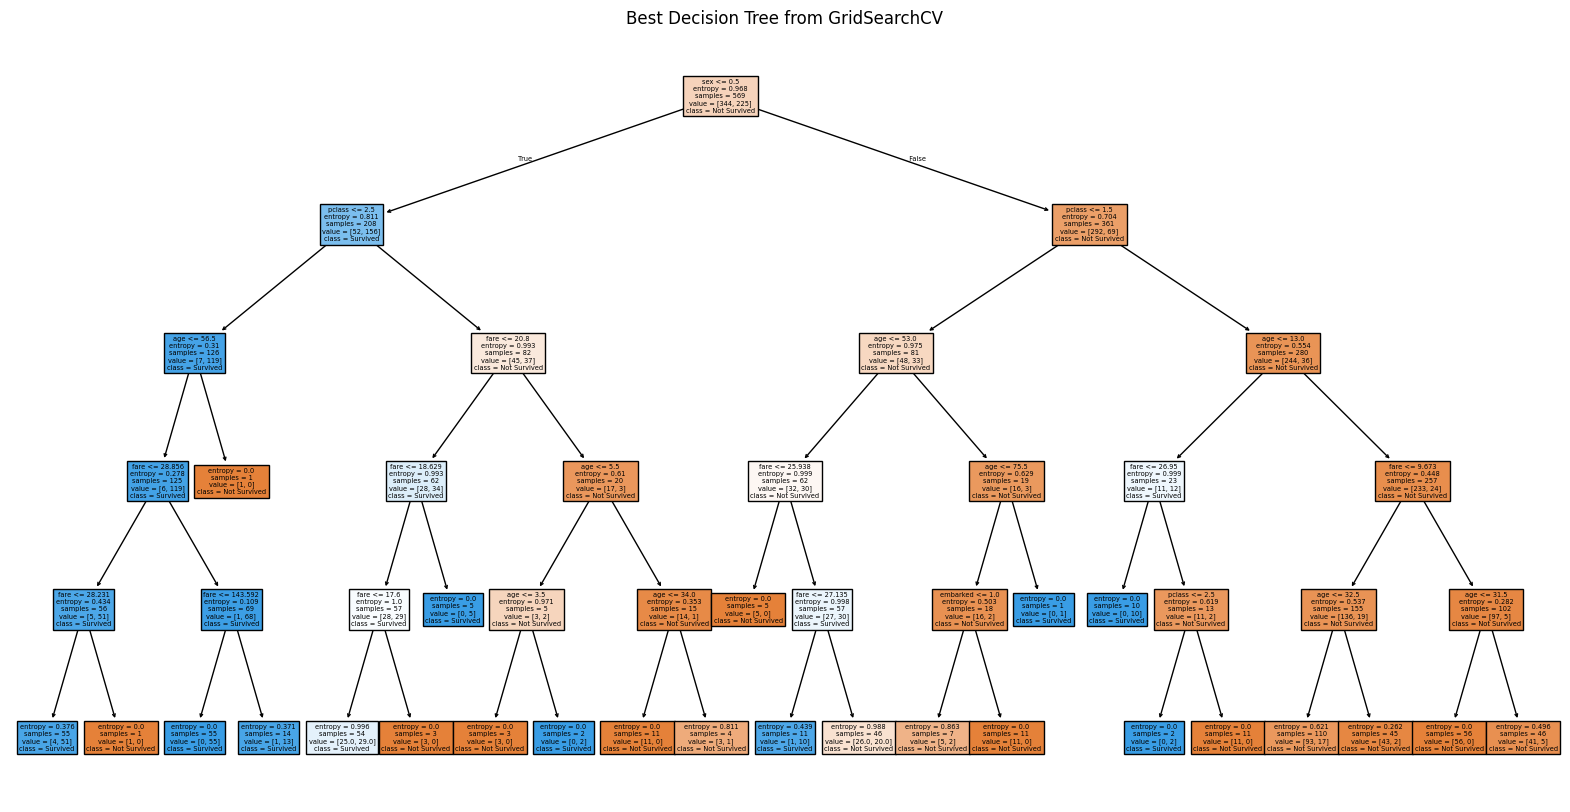

In [21]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Show the decision tree
plt.figure(figsize=(20, 10))
plot_tree(best_dt, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.title("Best Decision Tree from GridSearchCV")
plt.show()